# Preguntas Teóricas

1. Explique la diferencia entre descenso de gradiente, descenso de gradiente por mini batches y descenso de gradiente estocástico. Asegúrese de mencionar las ventajas y desventajas de cada enfoque.

### Descenso de gradiente

Es el enfoque tradicional donde se calcula el gradiente de la función de pérdida respecto a todos los features de la data de entrenamiento. Actualiza los pesos del modelo después de procesor todos los features de entrenamiento.
#### Ventajas:
- Garantiza la convergencia al mínimo local o global.
- Utiliza de manera eficiente el hardware al aprovechar operaciones vectorizadas.
#### Desventajas:
- Requiere almacenar todos los datos de entrenamiento en memoria, lo que es un problema para conjuntos muy grandes.
- Debido a que debe almacenar y analizar todos los datos su coste computacional aumenta.

### Descenso de Gradiente por Mini Lotes

Es una variante intermedia en donde la gradiente y los pesos se calculan utilizando un subconjunto pequeño (mini - bache) y fijo de los ejemplos de entrenamiento.
Estos "mini-lotes" se eligen aleatoriamente en cada iteración del entrenamiento.
#### Ventajas:
- Utiliza menos memoria en comparación con la variante anterior, debido al menor uso de features.
- Aprovecha la eficiencia de las operaciones vectorizadas y paralelismo en hardware moderno.
- Mejora la convergencia en problemas no convexos al introducir variabilidad en el cálculo de del gradiente.

#### Desventajas:
- Debido a la variabilidad de los features durante el entrenamiento puede llegar a requerir el ajuste de la tasa de aprendizaje.
- No garantiza convergencia al mínimo global en problemas no convexos.

#### Referencia
- https://medium.com/metadatos/todo-lo-que-necesitas-saber-sobre-el-descenso-del-gradiente-aplicado-a-redes-neuronales-19bdbb706a78

### Descenso de Gradiente Estocástico

El gradiente y los pesos son calculados y actualizados utilizando solo un ejemplo de entrenamiento a la vez, el cual es elegido aleatoriamente en cada iteración.

#### Ventajas
- Debido a que solo utiliza un solo ejemplo por cada iteración utiliza mucha menos memoria que las variantes anteriores, lo que permite entrenar modelos de conjuntos muy grandes.
- Su alta variabilidad en las actualizaciones ayuda a evitar mínimos locales en problemas no convexos.
- Converge más rápido inicialmente debido a las actualizaciones de pesos más frecuentes.

#### Desventajas
- Su alta variabilidad hace que el proceso de aprendizaje sea menos estable y requiere ajustar la tasa de aprendizaje de forma cuidadosa.
- No garantiza convergencia en problemas no convexos y puede oscilar alrededor del mínimo global.
- Menor aprovechamiento del parelelismo.

2. Compare y contraste técnicas de extracción de features (feature extraction) y selección de features (feature selection) en machine learning. De ejemplos de escenarios donde cada técnica sería más apropiada

### Extración de caracteristicas

Consiste en transformar los datos originales en un conjunto de caracteristicas nuevas y más representativas. Se utilizan algoritmos como el análisis de componentes principales (PCA) o la descompisición de valor singular (SVD) para crear nuevas caracteristicas que conserven la información relevante del conjunto de datos original. 

#### Escenarios de uso 

- Cuando se tiene un conjunto de datos con muchas características redundantes.
- Para reducir la dimensionalidad y mejorar la eficiencia computacional.
- Cuando se busca representar los datos de manera más compacta.

### Selección de caracteristicas

Consiste elegir un subconjunto de las caracteristicas originales, eliminando las menos relevantes o redundantes. Se pueden utlizar tecnicas como regularización o pruebas estadísticas como prueba de t de Student. 

#### Escenarios

- Cuando se quiere mejorar la interpretabilidad del modelo eliminando características irrelevantes.
- Para reducir el riesgo de sobreajuste en modelos complejos.
- En situaciones donde hay muchas características pero solo unas pocas son realmente informativas.

### Describa la arquitectura y el funcionamiento de un perceptrón de una sola capa (un tipo de red neuronal sin backpropagation). Explique cómo aprende y la forma en la que actualiza sus parámetros.

Un perceptrón de una sola capa es el tipo más sencillo de red neuronal. Fue inventado por Frank Rosenblatt en 1957. Consiste en una sola capa de neuronas de salida. Cada una de las neuronas está conectada a todas las entradas a través de pesos. 

Su funcionamiento se basa en la suma ponderada de sus entradas, a la cual se le aplica una función de activación (usualmente se usa una función escalón) para producir una salida binaria. 

El aprendizaje en este modelo ocurre al ajustar los pesos de las conexiones en respuesta a los errores cometidos en las predicciones. Para cada entrenamiento, el perceptrón compara su salida con la salida esperada y ajusta los pesos en dirección opuesta al error. Este proceso se repite por cada iteración hasta alcanzar un nivel aceptable de acierto. 

La fórmula para actualizar los pesos en un perceptrón es:

$$W_{nuevo} = W_{viejo} + \eta (Y_{deseado} - Y_{predicho})X$$

donde:
- $W$ representa los pesos,
- $\eta$ es la tasa de aprendizaje,
- $Y_{deseado}$ es la salida deseada,
- $Y_{predicho}$ es la salida predicha por el perceptrón,
- $X$ son las entradas.


Es importante decir que este proceso no usa back propagation ya que no hay capas ocultas que propaguen el error. 

*Link:*
*https://es.wikipedia.org/wiki/Perceptr%C3%B3n*

# Ejercicios Prácticos

## Task 2.1

### Gradiente Descendiente

In [147]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [148]:
lista_error_cuadratico = []
lista_tiempo_ejecucion = []

In [149]:
# Función polinómica
def polynomial(x):
    return 2 * x**3 - 3 * x**2 + 5 * x + 3

coeficientes_polinomio = [2, -3, 5, 3]
p = np.poly1d(coeficientes_polinomio)

# Función para obtener el costo. 
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

In [150]:
def run_gradient_descent(X, y_true, coefficients, learning_rate, n_iterations):
    # Almacenar el tiempo de inicio
    start_time = time.time()

    # Almacenar los resultados para graficar
    cost_history = []

    # Gradiente estocástico
    for _ in range(n_iterations):
        for i in range(len(X)):
            # Calcula la predicción utilizando np.polyval
            y_pred = np.polyval(coefficients, X[i])

            # Calcula el gradiente de la función de costo con respecto a los coeficientes
            dp = np.polyder(p)
            gradient = dp(X[i]) * (y_pred - y_true[i])

            # Actualiza los coeficientes utilizando el gradiente y la tasa de aprendizaje
            coefficients = coefficients - learning_rate * gradient

        # Calcula el costo actual y almacénalo para graficar
        y_final = np.polyval(coefficients, X)
        current_cost = cost_function(y_true, y_final)
        cost_history.append(current_cost)

    # Almacenar el tiempo de finalización
    end_time = time.time()

    # Calcular el tiempo de ejecución
    execution_time = end_time - start_time

    # append a las listas
    lista_tiempo_ejecucion.append(execution_time)
    lista_error_cuadratico.append(current_cost)

    # Muestra los coeficientes finales
    print("Coeficientes finales:", coefficients)

    # Imprimir el tiempo de ejecución
    print("Tiempo de ejecución:", execution_time, "segundos")

    # Grafica los datos reales y la predicción final
    plt.scatter(X, y_true, label='Datos reales')
    x_range = np.linspace(np.min(X), np.max(X), 100)
    y_pred = np.polyval(coefficients, x_range)
    plt.plot(x_range, y_pred, color='red', label='Polinomio ajustado')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Ajuste de polinomio con gradiente estocástico')

    # Ajustar los límites de la gráfica
    # plt.xlim([np.min(X) - 1, np.max(X) + 1])  # Puedes ajustar estos valores según sea necesario
    # plt.ylim([np.min(y_true) - 10, np.max(y_true) + 10])  # Ajusta el rango en y según tus datos

    plt.show()

    print("Costo final:", current_cost)


Coeficientes finales: [2.30613358 2.52334897 2.47283348 2.56223893]
Tiempo de ejecución: 27.240111827850342 segundos


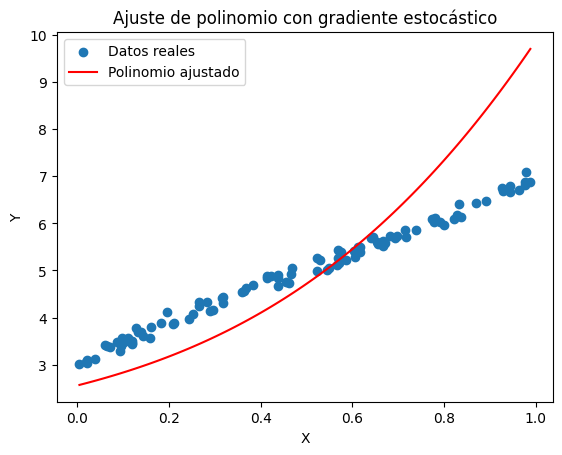

Costo final: 1.0262398965231314


In [151]:
# Datos de ejemplo
np.random.seed(0)
X = np.random.rand(100)
y_true = polynomial(X) + 0.1 * np.random.randn(100)

# Coeficientes iniciales
coefficients = np.random.rand(4)

# Tasa de aprendizaje y número de iteraciones
learning_rate = 0.01
n_iterations = 10000

# Llamar a la función principal
run_gradient_descent(X, y_true, coefficients, learning_rate, n_iterations)

### Descenso de Gradiente Estocástico

In [152]:
def gradient_descent(X, y_true, coefficients, learning_rate, n_iterations):
    # Almacenar los resultados para graficar
    cost_history = []
    start_time = time.time()

    # Descenso de gradiente
    for _ in range(n_iterations):
        # Calcula las predicciones utilizando np.polyval
        y_pred = np.polyval(coefficients, X)

        # Calcula el gradiente de la función de costo con respecto a los coeficientes
        gradient = np.polyder(coefficients, m=1)

        # Actualiza los coeficientes utilizando el gradiente y la tasa de aprendizaje
        coefficients = coefficients - learning_rate * np.polyval(gradient, X) @ (y_pred - y_true)

        # Calcula el costo actual y almacénalo para graficar
        current_cost = cost_function(y_true, y_pred)
        cost_history.append(current_cost)
        
    end_time = time.time()
    
    execution_time = end_time - start_time

    # append a las listas
    lista_tiempo_ejecucion.append(execution_time)
    lista_error_cuadratico.append(current_cost)


    # Muestra los coeficientes finales
    print("Coeficientes finales:", coefficients)
    print("Tiempo de ejecución:", execution_time, "segundos")
    # Grafica los datos reales y la predicción final
    plt.scatter(X, y_true, label='Datos reales')
    x_range = np.linspace(np.min(X), np.max(X), 100)
    y_pred = np.polyval(coefficients, x_range)
    plt.plot(x_range, y_pred, color='red', label='Polinomio ajustado')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Ajuste de polinomio con descenso de gradiente')
    plt.show()

Coeficientes finales:

 [2.06806794 2.28528333 2.23476784 2.32417329]
Tiempo de ejecución: 0.03820514678955078 segundos


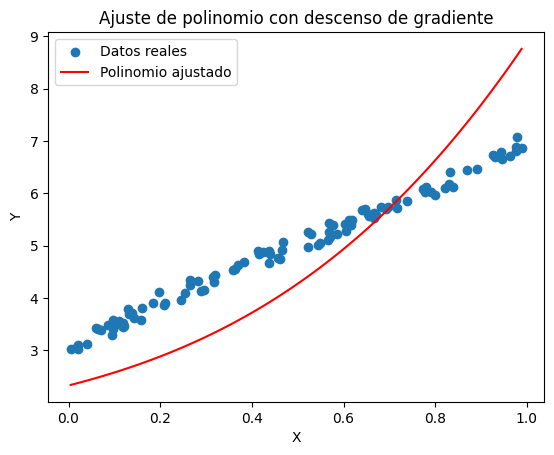

In [153]:
# Datos de ejemplo
np.random.seed(0)

X = np.random.rand(100)
y_true = polynomial(X) + 0.1 * np.random.randn(100)

# Coeficientes iniciales
coefficients = np.random.rand(4)

# Tasa de aprendizaje y número de iteraciones
learning_rate = 0.001
n_iterations = 1000

# Llama a la función principal para el descenso de gradiente
gradient_descent(X, y_true, coefficients, learning_rate, n_iterations)

### Descenso de gradiente por mini batches 

In [154]:
def run_mini_batch_gradient_descent(X, y_true, coefficients, learning_rate, n_iterations, batch_size):
    # Almacenar el tiempo de inicio
    start_time = time.time()

    # Almacenar los resultados para graficar
    cost_history = []

    # Mini-batch gradient descent
    for _ in range(n_iterations):
        indices = np.random.choice(len(X), size=batch_size, replace=False)
        X_batch = X[indices]
        y_batch = y_true[indices]

        # Calcula las predicciones utilizando np.polyval
        y_pred = np.polyval(coefficients, X_batch)

        # Calcula el gradiente de la función de costo con respecto a los coeficientes
        gradient = np.polyder(coefficients, m=1)

        # Actualiza los coeficientes utilizando el gradiente y la tasa de aprendizaje
        coefficients = coefficients - learning_rate * np.polyval(gradient, X_batch) @ (y_pred - y_batch)

        # Calcula el costo actual y almacénalo para graficar
        y_final = np.polyval(coefficients, X)
        current_cost = cost_function(y_true, y_final)
        cost_history.append(current_cost)

    # Almacenar el tiempo de finalización
    end_time = time.time()

    # Calcular el tiempo de ejecución
    execution_time = end_time - start_time

    # append a las listas
    lista_tiempo_ejecucion.append(execution_time)
    lista_error_cuadratico.append(current_cost)

    # Muestra los coeficientes finales
    print("Coeficientes finales:", coefficients)

    # Imprimir el tiempo de ejecución
    print("Tiempo de ejecución:", execution_time, "segundos")

    # Grafica los datos reales y la predicción final
    plt.scatter(X, y_true, label='Datos reales')
    x_range = np.linspace(0, 1, 100)
    y_pred = np.polyval(coefficients, x_range)
    plt.plot(x_range, y_pred, color='red', label='Polinomio ajustado')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.title('Ajuste de polinomio con mini-batch gradient descent')
    plt.show()

Coeficientes finales: [2.24557305 2.46278844 2.41227295 2.5016784 ]
Tiempo de ejecución: 0.08690905570983887 segundos


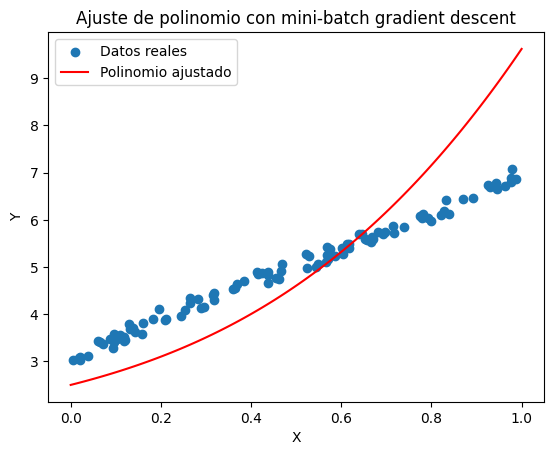

In [155]:
# Datos de ejemplo
np.random.seed(0)

X = np.random.rand(100)
y_true = polynomial(X) + 0.1 * np.random.randn(100)

# Coeficientes iniciales
coefficients = np.random.rand(4)

# Tasa de aprendizaje, número de iteraciones y tamaño del mini-batch
learning_rate = 0.01
n_iterations = 1000
batch_size = 10

# Llamar a la función principal para el mini-batch gradient descent
run_mini_batch_gradient_descent(X, y_true, coefficients, learning_rate, n_iterations, batch_size)

In [156]:
print("Tiempos de ejecución: ")
print("Gradiente Normal: ", lista_tiempo_ejecucion[0])
print("Gradiente Estocástico: ", lista_tiempo_ejecucion[1])
print("Gradiente Mini-Batch: ", lista_tiempo_ejecucion[2])

print("\nErrores cuadráticos: ")
print("Gradiente Normal: ", lista_error_cuadratico[0])
print("Gradiente Estocástico: ", lista_error_cuadratico[1])
print("Gradiente Mini-Batch: ", lista_error_cuadratico[2])

Tiempos de ejecución: 
Gradiente Normal:  27.240111827850342
Gradiente Estocástico:  0.03820514678955078
Gradiente Mini-Batch:  0.08690905570983887

Errores cuadráticos: 
Gradiente Normal:  1.0262398965231314
Gradiente Estocástico:  0.8025074176211365
Gradiente Mini-Batch:  0.9186383198591054


EL gradiente estocástico es el modelo que se ejecuta mas rápido para este conjunto de datos. Esto puede explicarse por la cantidad de operaciones que se realizan. Mientras que el gradiente normal itera por todos los valores posibles dentro de un rango, el gradiente estocástico utiliza valores al azar. 

En cuanto a que modelo lo hizo mejor, podemos apreciar que el gradiente estocástico también tuvo mejor desempeño. Esto puede tener varias explicaciones, pero la más probable debido a la implementación, es el menor número de operaciones que realiza este modelo. 

## Task 2.2 - Feature Selection

In [157]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [158]:
datos = pd.read_csv('lol.csv')
datos.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [159]:
X = datos.drop("blueWins", axis=1)
y = datos["blueWins"].values

In [160]:
X.head()

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,28,2,1,9,6,11,0,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,12,1,0,5,5,5,0,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,15,0,0,7,11,4,1,1,0,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,43,1,0,4,5,5,1,0,1,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,75,4,0,6,6,6,0,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


Los datos fueron normalizados debido a que muchos de ellos se encontraban esparcidos en un amplio rango, lo que hacia que el entrenamiento del modelo SVM se extendiera a más de 1 hora por modelo.

In [161]:
from sklearn.preprocessing import StandardScaler

escalador = StandardScaler()
X = pd.DataFrame(escalador.fit_transform(X), columns=X.columns)

In [162]:
X.head()

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0.691784,0.316996,-0.379275,0.990429,0.935301,-0.046926,1.071495,-0.879231,-0.753226,-0.481132,...,-0.198353,0.052293,-0.410475,-0.763215,-0.928741,0.367685,-0.256228,-0.013342,-0.928741,0.052293
1,0.844625,-0.570992,-0.839069,-1.009663,-0.393216,-0.387796,-0.404768,-0.879231,-0.753226,-0.481132,...,4.412301,0.758619,-0.410475,-0.436980,1.033784,0.068504,1.191254,0.593342,1.033784,0.758619
2,0.775808,-0.404494,-1.298863,-1.009663,0.271042,1.657424,-0.650812,0.719503,1.327623,-0.481132,...,-0.198353,0.533909,-0.410475,-0.590502,-0.654900,-2.324944,0.483614,0.520436,-0.654900,0.533909
3,0.881333,1.149484,-0.839069,-1.009663,-0.725346,-0.387796,-0.404768,0.719503,-0.753226,2.078430,...,-0.198353,-0.007406,0.244627,-0.000609,0.805583,-0.430131,0.544350,-0.013863,0.805583,-0.007406
4,-2.323029,2.925460,0.540312,-1.009663,-0.061087,-0.046926,-0.158724,-0.879231,-0.753226,-0.481132,...,-0.198353,0.613731,0.244627,0.293085,0.349182,1.564408,0.415133,-0.137283,0.349182,0.613731


In [163]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

Se seleccionarán 2 columnas (features) por cada versión, y esto es así debido a que se desea comparar contra la versión del laboratorio anterior, en la cual solo se utilizaron 2 columnas, además se utilizará la métrica de acurracy (precisión) debido a que nos otorga una métrica general del desempeño del modelo, además se tomó esta métrica como la elegida debido a que los datos se encuentran balanceados entre las diferentes columnas.

### Selección de Características Univariate

In [164]:
from sklearn.feature_selection import SelectKBest, f_classif
KBestSelector = SelectKBest(f_classif, k = 2)
KBestSelector.fit(X, y)
selected_columns_indice = KBestSelector.get_support(indices=True)
selected_columns = X.columns[selected_columns_indice]
print(selected_columns)

Index(['blueGoldDiff', 'redGoldDiff'], dtype='object')


In [165]:
X_new = X[selected_columns].values
X_new

array([[ 0.25622839, -0.25622839],
       [-1.191254  ,  1.191254  ],
       [-0.48361406,  0.48361406],
       ...,
       [-0.99070167,  0.99070167],
       [-0.34787437,  0.34787437],
       [ 0.37199437, -0.37199437]])

In [166]:
#Dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X_new, y, test_size = 0.2, random_state = 1)

In [167]:
# Entrene el modelo de SVM con el conjunto de entrenamiento
from sklearn.svm import SVC
model = SVC(kernel='linear')
model.fit(X_entreno, y_entreno)

SVC(kernel='linear')

In [168]:
# Predicción y métricas de evaluación
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_prueba)
print("accuracy_score: ", accuracy_score(y_prueba, y_pred))
print("classification_report: \n", classification_report(y_prueba, y_pred))

accuracy_score:  0.728744939271255
classification_report: 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1002
           1       0.72      0.74      0.73       974

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



### Tunning

In [169]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Definir los parámetros a ajustar para el modelo SVC
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 'auto'], 
    'kernel': ['linear', 'rbf']  
}


grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_entreno, y_entreno)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Mejores parámetros:", best_params)

y_pred = best_model.predict(X_prueba)

accuracy = accuracy_score(y_prueba, y_pred)
print("Accuracy:", accuracy)

Mejores parámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7302631578947368


### Eliminación Recursiva de Características

In [170]:
X.head()

,gameId,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,0.691784,0.316996,-0.379275,0.990429,0.935301,-0.046926,1.071495,-0.879231,-0.753226,-0.481132,...,-0.198353,0.052293,-0.410475,-0.763215,-0.928741,0.367685,-0.256228,-0.013342,-0.928741,0.052293
1,0.844625,-0.570992,-0.839069,-1.009663,-0.393216,-0.387796,-0.404768,-0.879231,-0.753226,-0.481132,...,4.412301,0.758619,-0.410475,-0.436980,1.033784,0.068504,1.191254,0.593342,1.033784,0.758619
2,0.775808,-0.404494,-1.298863,-1.009663,0.271042,1.657424,-0.650812,0.719503,1.327623,-0.481132,...,-0.198353,0.533909,-0.410475,-0.590502,-0.654900,-2.324944,0.483614,0.520436,-0.654900,0.533909
3,0.881333,1.149484,-0.839069,-1.009663,-0.725346,-0.387796,-0.404768,0.719503,-0.753226,2.078430,...,-0.198353,-0.007406,0.244627,-0.000609,0.805583,-0.430131,0.544350,-0.013863,0.805583,-0.007406
4,-2.323029,2.925460,0.540312,-1.009663,-0.061087,-0.046926,-0.158724,-0.879231,-0.753226,-0.481132,...,-0.198353,0.613731,0.244627,0.293085,0.349182,1.564408,0.415133,-0.137283,0.349182,0.613731


In [171]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

model2 = SVC(kernel='linear')
rfe = RFE(estimator=model2, n_features_to_select=2, step=1)
rfe.fit(X, y)

KeyboardInterrupt: 

In [ ]:
selected_columns_indice = rfe.get_support(indices=True)
selected_columns = X.columns[selected_columns_indice]
print(selected_columns)

X_new = X[selected_columns].values
print(X_new)

#Dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X_new, y, test_size = 0.2, random_state = 1)

Index(['blueGoldDiff', 'redGoldDiff'], dtype='object')
[[ 0.25622839 -0.25622839]
 [-1.191254    1.191254  ]
 [-0.48361406  0.48361406]
 ...
 [-0.99070167  0.99070167]
 [-0.34787437  0.34787437]
 [ 0.37199437 -0.37199437]]


In [ ]:
# Entrene el modelo de SVM con el conjunto de entrenamiento
model2.fit(X_entreno, y_entreno)

SVC(kernel='linear')

In [ ]:
# Predicción y métricas de evaluación
from sklearn.metrics import accuracy_score, classification_report
y_pred = model.predict(X_prueba)
print("accuracy_score: ", accuracy_score(y_prueba, y_pred))
print("classification_report: \n", classification_report(y_prueba, y_pred))

accuracy_score:  0.728744939271255
classification_report: 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1002
           1       0.72      0.74      0.73       974

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



### Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Definir los parámetros a ajustar para el modelo SVC
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 'auto'], 
    'kernel': ['linear', 'rbf']  
}


grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_entreno, y_entreno)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Mejores parámetros:", best_params)

y_pred = best_model.predict(X_prueba)

accuracy = accuracy_score(y_prueba, y_pred)
print("Accuracy:", accuracy)

Mejores parámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7302631578947368


### Selección de Características basada en Importancia de Árboles

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

#Dividir el conjunto de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 1)

rf_classifer = RandomForestClassifier(random_state=42)
rf_classifer.fit(X_entreno, y_entreno)


RandomForestClassifier(random_state=42)

In [ ]:
selector = SelectFromModel(estimator=rf_classifer, max_features=2,prefit=True)


X_train_selected = selector.transform(X_entreno)
X_test_selected = selector.transform(X_prueba)

svc = SVC(kernel='linear')
svc.fit(X_train_selected, y_entreno)

C:\Users\aleaz\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
C:\Users\aleaz\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


SVC(kernel='linear')

In [ ]:
# Obtener los nombres de las características seleccionadas
X_selected_columns = X.columns[selector.get_support()]

print("Características seleccionadas:", X_selected_columns)

Características seleccionadas: Index(['blueGoldDiff', 'redGoldDiff'], dtype='object')


In [ ]:
# Predicción y métricas de evaluación
from sklearn.metrics import accuracy_score, classification_report
y_pred = svc.predict(X_test_selected)
print("accuracy_score: ", accuracy_score(y_prueba, y_pred))
print("classification_report: \n", classification_report(y_prueba, y_pred))

accuracy_score:  0.728744939271255
classification_report: 
               precision    recall  f1-score   support

           0       0.74      0.72      0.73      1002
           1       0.72      0.74      0.73       974

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



### Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Definir los parámetros a ajustar para el modelo SVC
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 'auto'], 
    'kernel': ['linear', 'rbf']  
}


grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_selected, y_entreno)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Mejores parámetros:", best_params)

y_pred = best_model.predict(X_test_selected)

accuracy = accuracy_score(y_prueba, y_pred)
print("Accuracy:", accuracy)

Mejores parámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7302631578947368


### Lab 02

In [ ]:
# Support Vector Machine using libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
dataset = pd.read_csv("lol.csv")

# insert on a dataframe called pd the following columns: blueKills', 'blueAvgLevel', 'blueWins'
pd = dataset[['blueKills', 'blueAvgLevel', 'blueWins']]

X = pd.iloc[:, :-1].values
y = pd.iloc[:, -1].values

#Dividir el conjunto de datos en entrenamiento y prueba
X_entreno, X_prueba, y_entreno, y_prueba = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Entrene el modelo de SVM con el conjunto de entrenamiento
model = SVC(kernel='linear')
model.fit(X_entreno, y_entreno)

# Predicción y métricas de evaluación
y_pred = model.predict(X_prueba)
print("accuracy_score: ", accuracy_score(y_prueba, y_pred))
print("classification_report: \n", classification_report(y_prueba, y_pred))

accuracy_score:  0.6771255060728745
classification_report: 
               precision    recall  f1-score   support

           0       0.68      0.69      0.68      1002
           1       0.68      0.67      0.67       974

    accuracy                           0.68      1976
   macro avg       0.68      0.68      0.68      1976
weighted avg       0.68      0.68      0.68      1976



### Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Definir los parámetros a ajustar para el modelo SVC
param_grid = {
    'C': [0.1, 1, 10, 100], 
    'gamma': ['scale', 'auto'], 
    'kernel': ['linear', 'rbf']  
}


grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_entreno, y_entreno)

best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Mejores parámetros:", best_params)

y_pred = best_model.predict(X_prueba)

accuracy = accuracy_score(y_prueba, y_pred)
print("Accuracy:", accuracy)

Mejores parámetros: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.6821862348178138


De las 4 versiones, 3 obtuvieron un puntaje de accuracy igual, estos fueron los que utilizaron las técnicas de feature selection, esto es debido a que dichos selectores escogieron las mismas 2 columnas, siendo estas las mejores para trabajar, en todos los casos (por eso es que el resultado es el mismo), mientras que la versión realizada en el laboratorio 2, se utilizaron columnas seleccionadas a "ojo", es por esto que los puntajes salieron 0.72 contra 0.67, una diferencia de tan solo 0.05, indicando que las columnas utilizadas en el laboratorio anterior se acercaron bastante, sin embargo no son las mejores.

## Task 2.3 - Perceptrón

In [ ]:
# implementación de perceptrón de una capa

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import Perceptron
%matplotlib inline


In [ ]:
# Cargar el conjunto de datos
iris = load_iris()

X = iris.data[:, :2]  # (sepal length y sepal width)
# exluir la clase 0
y = iris.target != 0

print(y)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
clf = Perceptron(eta0=0.1, random_state=1)
clf.fit(X_train, y_train)

Perceptron(eta0=0.1, random_state=1)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
# Calcular la precisión del clasificador
print("classification_report: \n", classification_report(y_test, y_pred))

classification_report: 
               precision    recall  f1-score   support

       False       1.00      0.82      0.90        11
        True       0.90      1.00      0.95        19

    accuracy                           0.93        30
   macro avg       0.95      0.91      0.93        30
weighted avg       0.94      0.93      0.93        30



Se eligió basarse en la metrica de precision debido a que es fácil de entender e interpretar. Es simplemente la proporción de las instancias clasificadas correctamente sobre el total de instancias evaluadas. Esto hace que sea una métrica intuitiva y fácil de comunicar.

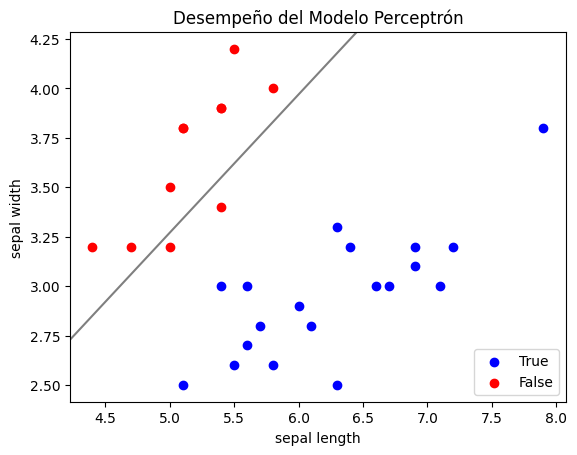

In [ ]:
# Scatter plot

plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], c='blue', label='True')
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], c='red', label='False')

# Añadir etiquetas y leyenda
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Desempeño del Modelo Perceptrón')

# Crear la línea de límite (boundary)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Crear puntos para trazar la línea de límite
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# Obtener decision_function para cada punto en la malla1
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Trazar la línea de límite
plt.contour(xx, yy, Z, colors='k', levels=[0], alpha=0.5, linestyles=['-'])

# Mostrar la gráfica
plt.legend(loc='lower right')
plt.show()


# Repo
https://github.com/angelcast2002/Lab03-IA